# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the *synth1* data into python using the *loadmat* function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided *clusterPlot()* function.
 + *In Python, you can use the function k_means() from the package sklearn.cluster to compute *k*-means clustering.*
 + *Type clusterPlot(X,clusters,centroids,y) to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


In [1]:
%matplotlib inline
from Toolbox.clusterPlot import clusterPlot
from Toolbox.clusterVal import clusterVal
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

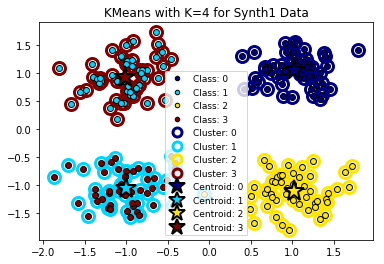

In [2]:
##Answer to question 4.1.1a

synth1 = loadmat('Data/synth1.mat')

X1 = synth1['X']
y1 = synth1['y']

kmeans1 = KMeans(n_clusters=4).fit(X1)

plot1 = clusterPlot(X1,kmeans1.predict(X1),kmeans1.cluster_centers_,y1)
plt.title('KMeans with K=4 for Synth1 Data')
plt.show()

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

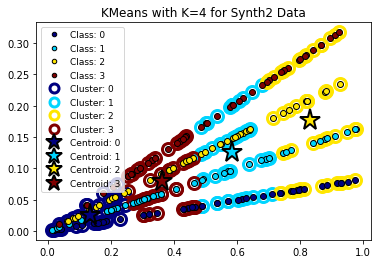

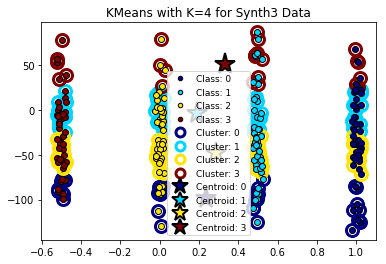

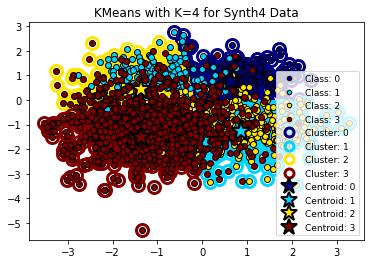

In [3]:
##Answer to question 4.1.1b

synth2 = loadmat('Data/synth2.mat')
synth3 = loadmat('Data/synth3.mat')
synth4 = loadmat('Data/synth4.mat')

X2 = synth2['X']
y2 = synth2['y']
X3 = synth3['X']
y3 = synth3['y']
X4 = synth4['X']
y4 = synth4['y']

kmeans2 = KMeans(n_clusters=4).fit(X2)
kmeans3 = KMeans(n_clusters=4).fit(X3)
kmeans4 = KMeans(n_clusters=4).fit(X4)

plot2 = clusterPlot(X2,kmeans2.predict(X2),kmeans2.cluster_centers_,y2)
plt.title('KMeans with K=4 for Synth2 Data')
plt.show()
plot3 = clusterPlot(X3,kmeans3.predict(X3),kmeans3.cluster_centers_,y3)
plt.title('KMeans with K=4 for Synth3 Data')
plt.show()
plot4 = clusterPlot(X4,kmeans4.predict(X4),kmeans4.cluster_centers_,y4)
plt.title('KMeans with K=4 for Synth4 Data')
plt.show()

*Double click to type your answer for 4.1.1b here:*

The KMeans algorithm utilizes the euclidian distance as its similarity measurement for datapoints. This leads to certain types of data distributions to be more clusterable. This similarity measure favors rather circular structures that do not overlap. Synth1 being a prime example of such data gets clustered rather well, with only 1 visible error. 
Synth2 has a structure that is very obvious to people, but the euclidian distance as the only similarity measure does not work well. For such data, an algorithm that first finds the center of the beam, then initializes the clusters and finally moves to the nearest neighbor for every direction/cluster could be implemented. 
For Synth3, the horizontal distance would be a better option. Finally, Synth4 seems to either be overlapping (varying densities) or it is all one big cluster, so k=4 is a bad choice.

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

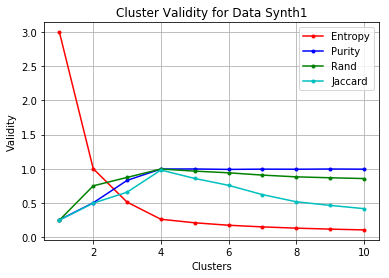

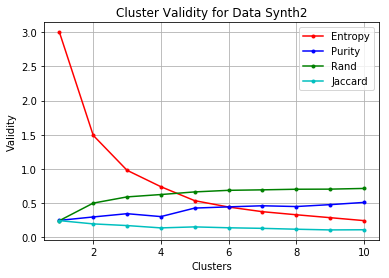

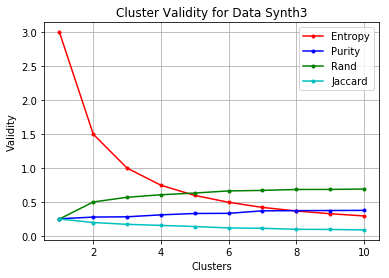

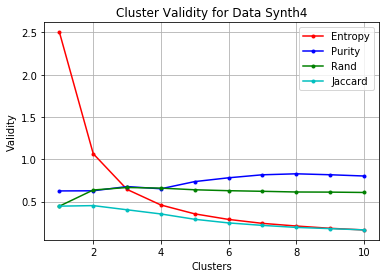

In [4]:
##Answer to question 4.1.2a

def validity(data, classes, label):
    Entropy = []
    Purity = []
    Rand = []
    Jaccard = []

    a = np.arange(10) + 1

    for i in a:
        kmeans = KMeans(n_clusters=i).fit(data)
        E, P, R, J = clusterVal(classes, kmeans.predict(data))
        Entropy.append(E)
        Purity.append(P)
        Rand.append(R)
        Jaccard.append(J)
                
    plt.plot(a,Entropy,'.-r', label = "Entropy")
    plt.plot(a,Purity,'.-b', label = "Purity")
    plt.plot(a,Rand,'.-g', label = "Rand")
    plt.plot(a,Jaccard,'.-c', label = "Jaccard")
    plt.xlabel('Clusters')
    plt.ylabel('Validity')
    plt.title('Cluster Validity for Data ' + label)
    plt.legend()
    plt.grid(True)
    plt.show()
    
validity(X1, y1, 'Synth1')
validity(X2, y2, 'Synth2')
validity(X3, y3, 'Synth3')
validity(X4, y4, 'Synth4')

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

*Double click to type your answer for 4.1.2b here:*

At K=4 all validity measures, except for entropy, reach their optimum for Synth1. For entropy, this means minimizing the value, whereas fo rthe others it means maximizing. The entropy's derivative also reached nearly 0 (minimal improvement from that point on). This coincides with the true cluster number 4. This is one way the measures can be used to determine the optimal number of clusters. However, this requires the data to be well classified by the algorithm, which is not the case for Synth 2 to 4 and thus the validity measures are not very useful. The fact that they show no optimum suggests that either more clusters should be tried, or that the algorithm has failed to cluster the data well.

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command imshow(np.reshape(X[k,:],(c,x,y)).T) which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


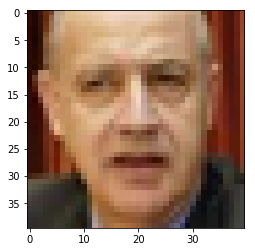

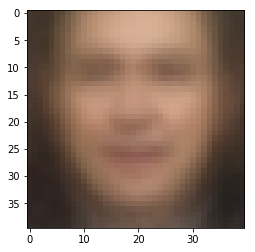

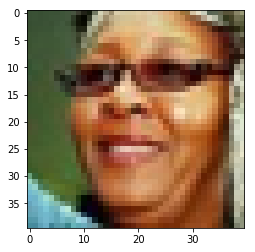

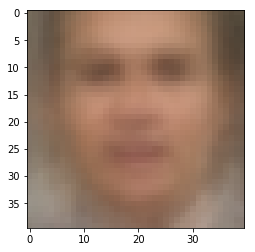

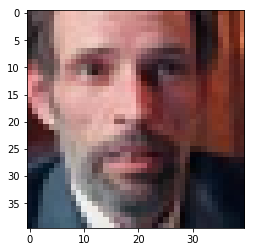

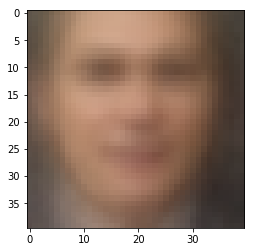

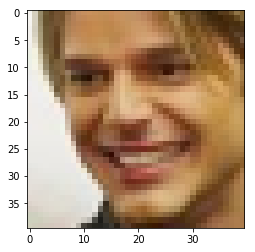

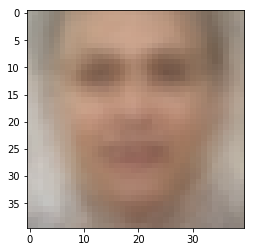

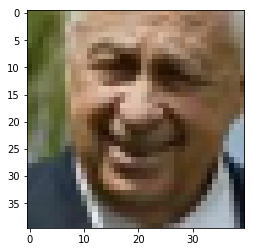

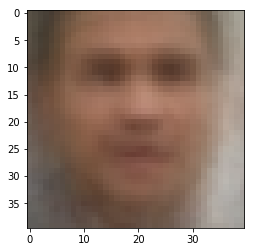

In [5]:
##Answer to question 4.1.3a

wildfaces = loadmat('Data/wildfaces.mat')
X = wildfaces['X']

K=10

kmeans = KMeans(n_clusters=K).fit(X)

for i in range(5):
    
    k = random.randrange(0, 1000)
    plt.imshow(np.reshape(X[k,:],(3,40,40)).T)
    plt.show()
    l = kmeans.labels_[k]
    plt.imshow(np.reshape(kmeans.cluster_centers_[l,:],(3,40,40)).T)
    plt.show()

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

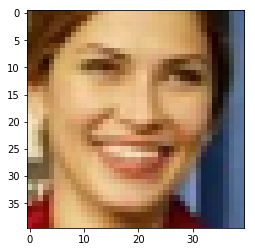

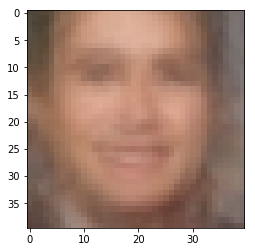

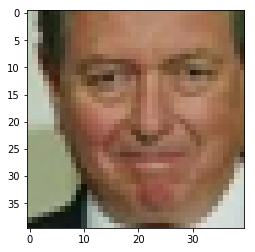

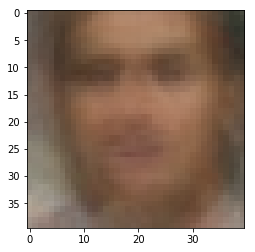

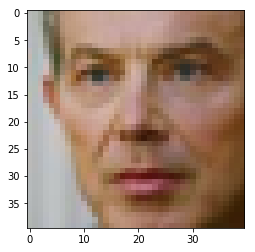

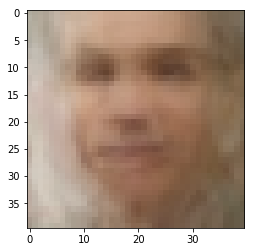

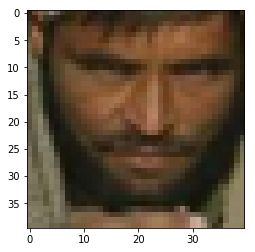

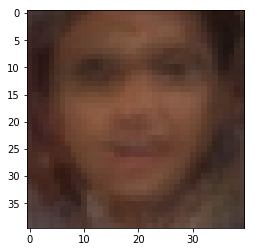

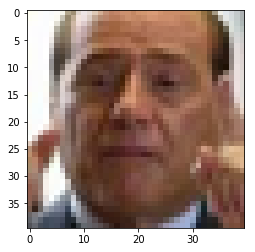

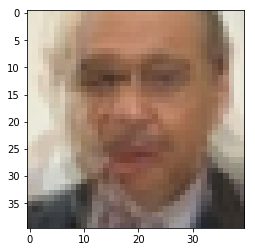

In [6]:
##Answer to question 4.1.3b

K=100

kmeans = KMeans(n_clusters=K).fit(X)

for i in range(5):
    
    k = random.randrange(0, 1000)
    plt.imshow(np.reshape(X[k,:],(3,40,40)).T)
    plt.show()
    l = kmeans.labels_[k]
    plt.imshow(np.reshape(kmeans.cluster_centers_[l,:],(3,40,40)).T)
    plt.show()

*Double click to type your answer for 4.1.3b here:*

At k=10 the image reconstructions is moderate at best. More clusters and thus more centroids are however respectable representations of the original. 100 clusters (maybe intuitively think about averaging 10 faces) seem to be enough to distinguish faces given the original data's resolution. Less than 10 makes the faces become very abstract and thus not suitable for data compression.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter cmap=cm.binary to the function imshow().

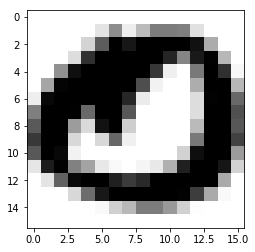

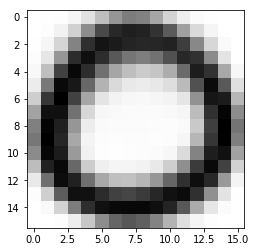

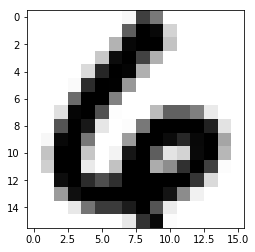

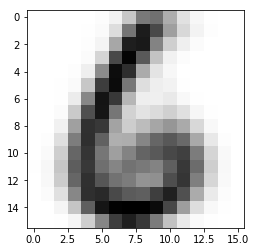

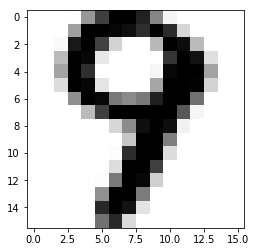

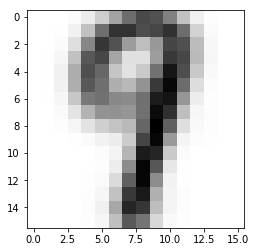

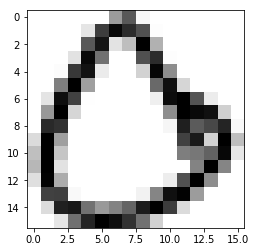

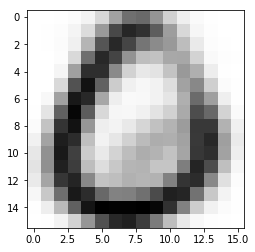

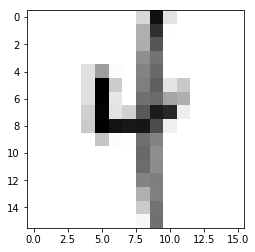

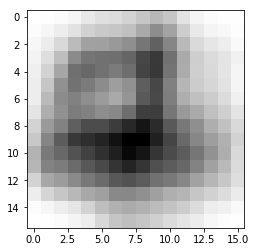

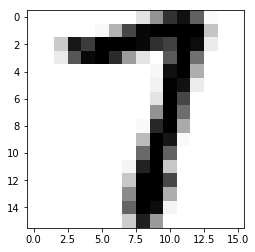

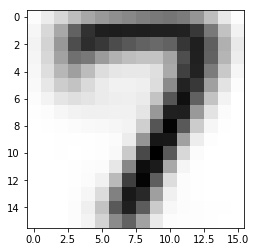

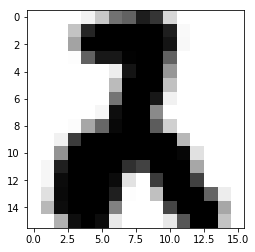

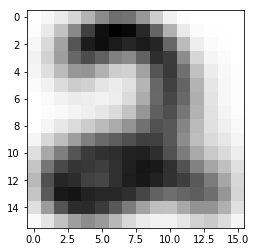

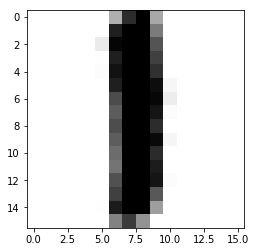

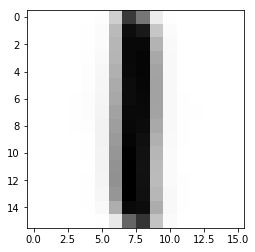

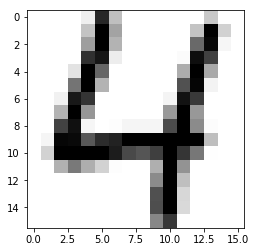

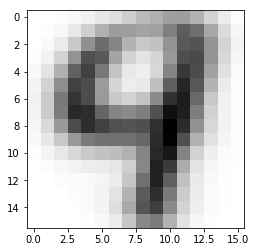

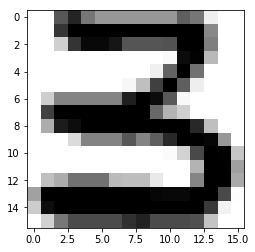

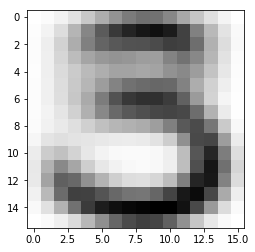

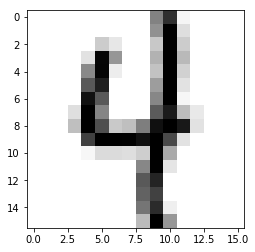

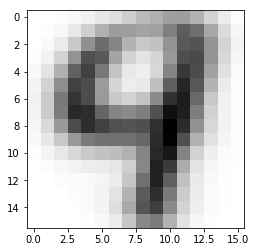

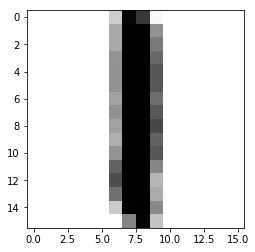

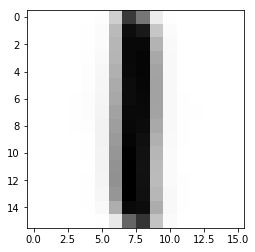

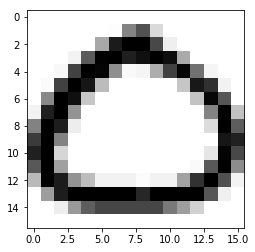

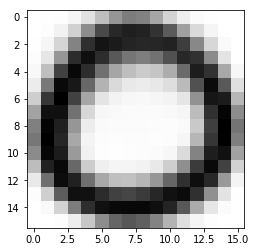

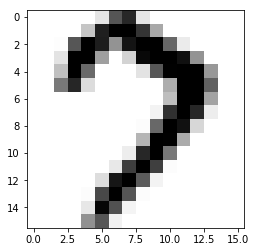

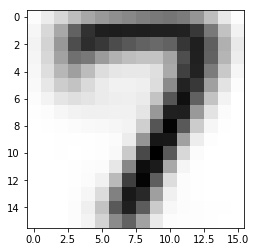

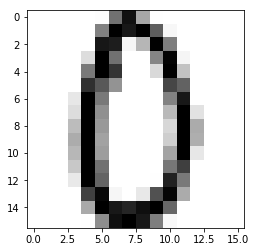

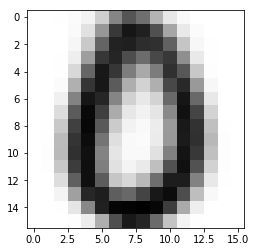

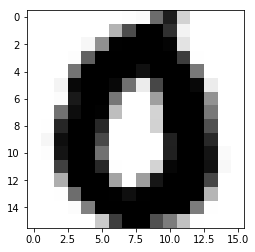

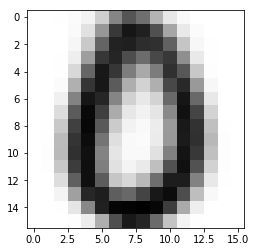

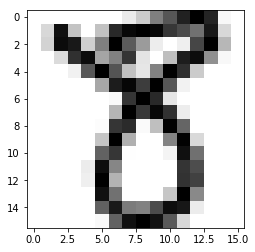

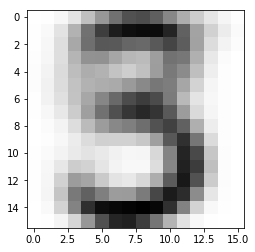

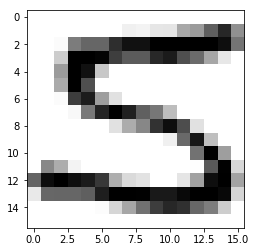

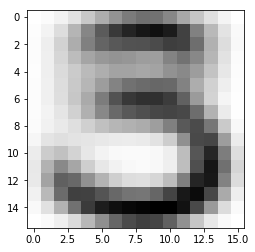

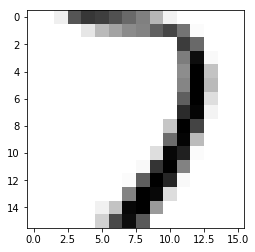

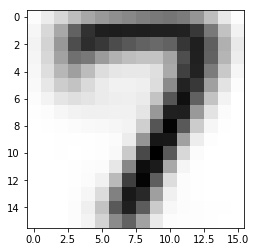

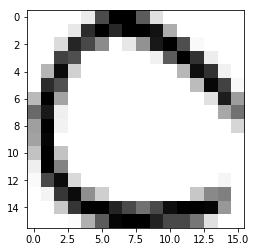

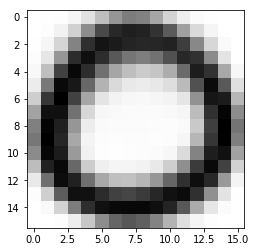

In [7]:
##Answer to question 4.1.4a

digits = loadmat('Data/digits.mat')
X = digits['X']
y = digits['y']
        
K=14

kmeans = KMeans(n_clusters=K).fit(X)

for i in range(20):        # 20 Examples
    
    k = random.randrange(0, 9298)    # generate random index for example
    plt.imshow(np.reshape(X[k,:],(16,16)),cmap='binary')   # show image at index
    plt.show()
    l = kmeans.labels_[k]    # find centroid to which indexed datapoint belongs to
    plt.imshow(np.reshape(kmeans.cluster_centers_[l,:],(16,16)), cmap='binary')    # plot the centroid
    plt.show()

### Centroids ####

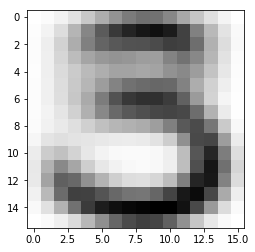

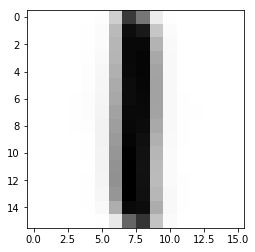

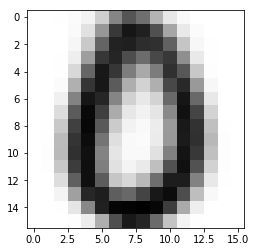

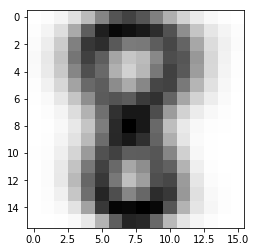

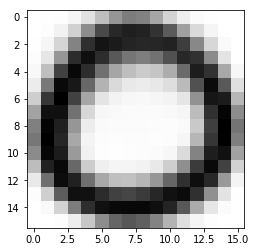

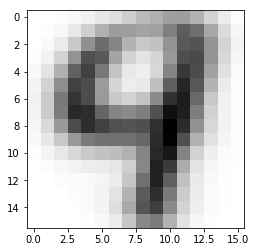

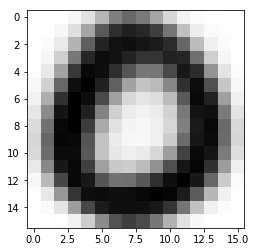

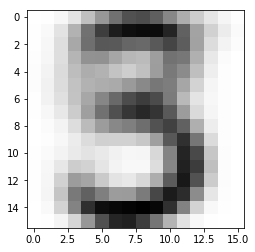

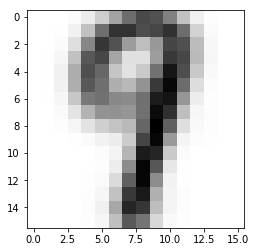

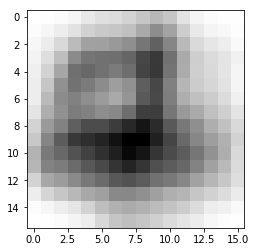

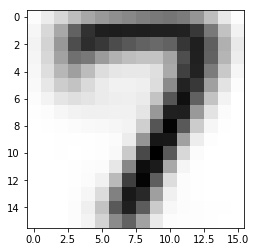

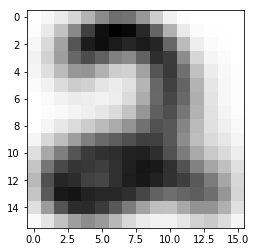

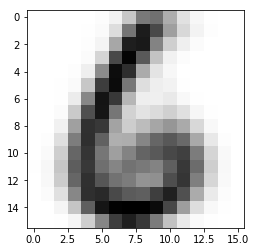

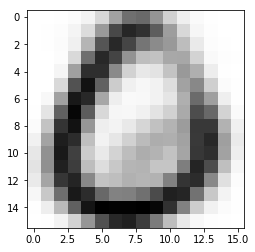

In [8]:
for i in range(K):
    plt.imshow(np.reshape(kmeans.cluster_centers_[i,:],(16,16)), cmap='binary')
    plt.show()

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

*Double click to type your answer for 4.1.4b here:*

The issue seems to be that within a class of digits (e.g. 0) there can be more variance than between two different classes of digits (e.g. 3 & 9, 3 & 8, 5 & 6), making multible clusters necessary for one digit. This means, according to the euclidian distance, many 3s and 9s are more similar than two zeroes. The classes do not have the same densities, hence the euclidian distance with Kmeans, favoring equallly dense classes, is having issues. This is understandable, since the 0 can be very wide, or look more like a O, or anything in between, whereas other digits tend to be more centered. The image of a 5 seems to have the most datapoints that are close to others (e.g. the 6 and 8). Since the euclidian distance between two 0s can be larger than a 5 and a 6, the centroid of the cluster favors two 0s. Using at least K=14 clusters seems to ensure that all digits are represented.

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package *scipy.cluster.hierarchy*. The function *linkage()* forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function *fcluster* extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function *linkage()* computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type *Z = linkage(X, method='single', metric='euclidean')* to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function*fcluster()*. For example, type *cls = fcluster(Z, criterion='maxclust', t=4)* to get a maximum of 4 clusters. Type *help(fcluster)* (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

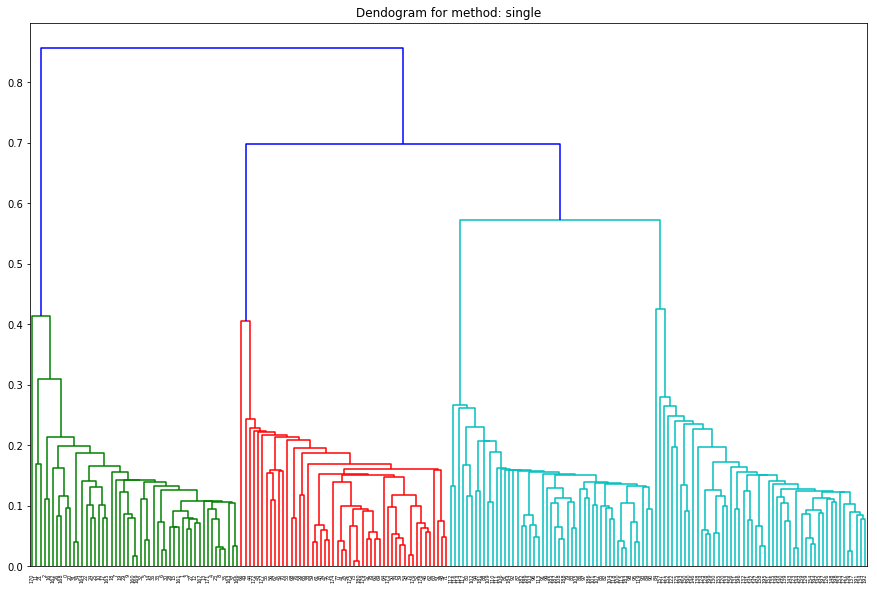

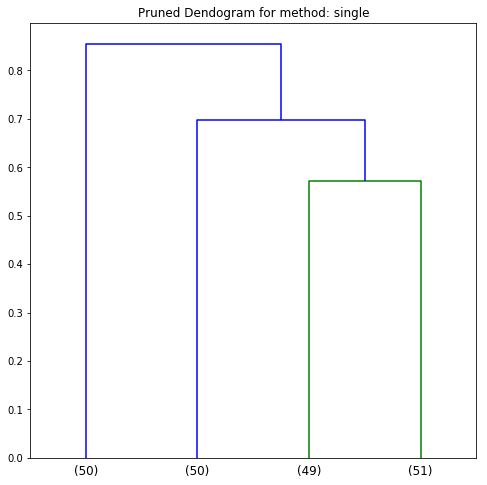

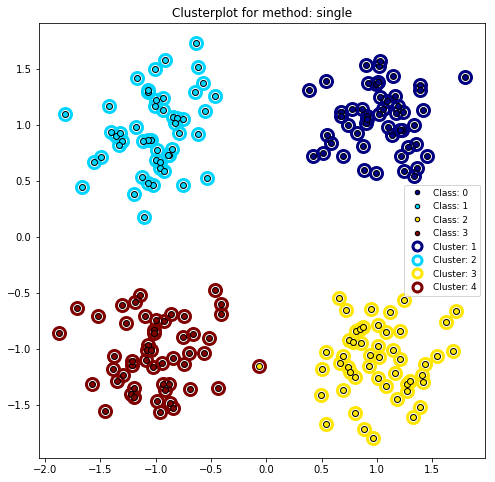

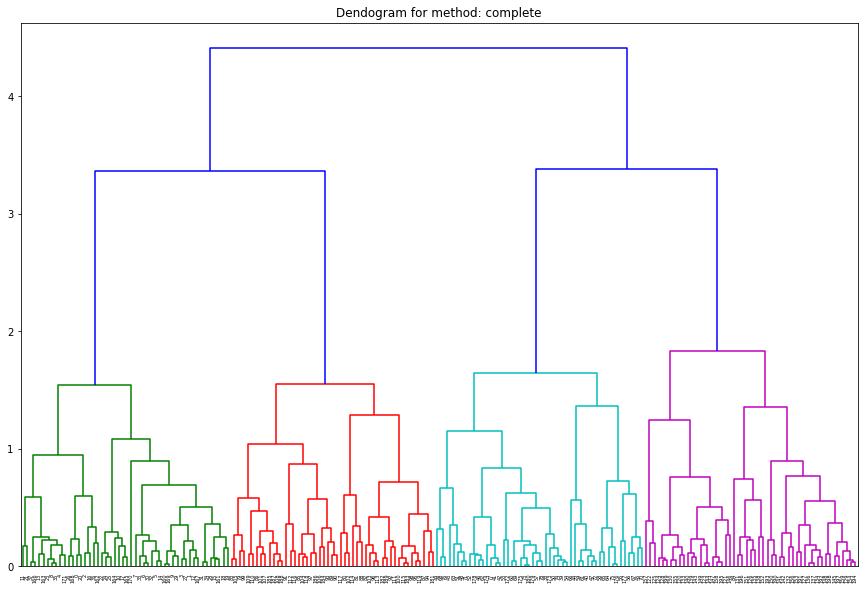

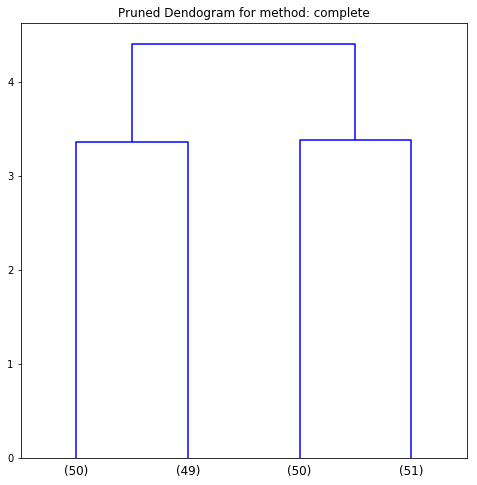

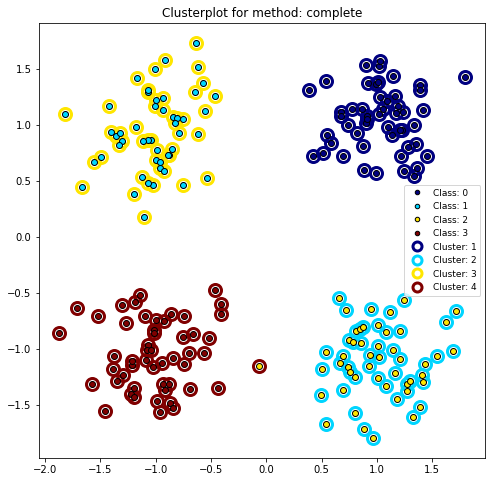

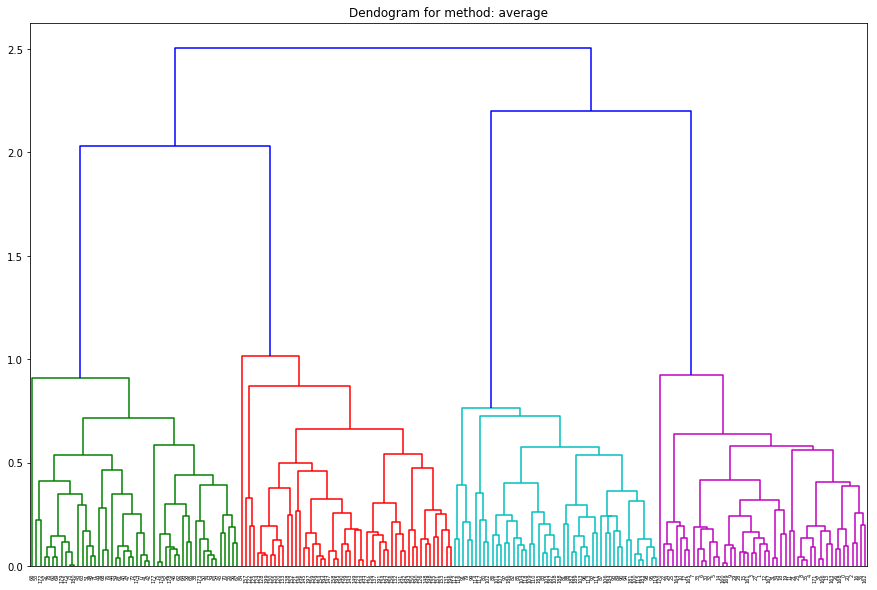

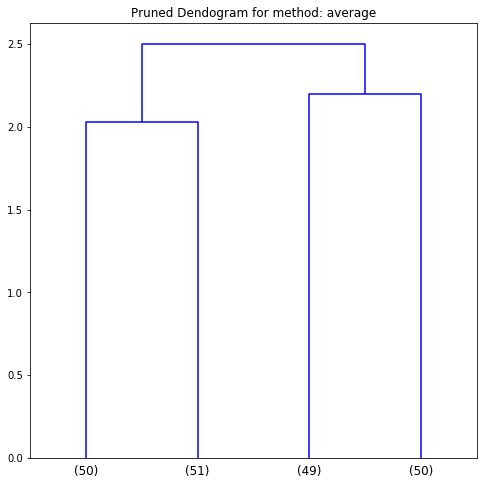

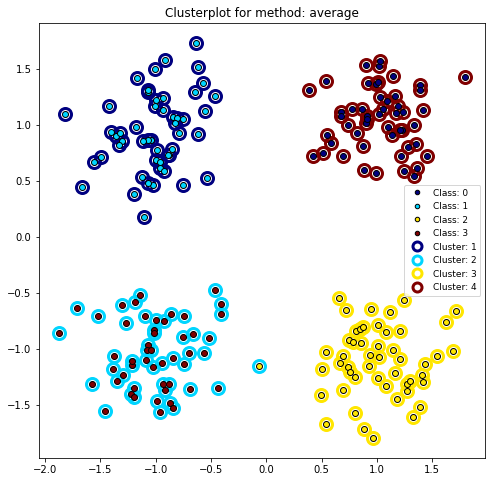

In [9]:
##Answer to question 4.2.1a

synth1 = loadmat('Data/synth1.mat')

X1 = synth1['X']
y1 = synth1['y']

methods = ['single','complete','average']

m = 'euclidean'

def hclust(X1,y1,m):
    for i in methods:

        lkg = linkage(X1, i, metric=m)
        clt = fcluster(lkg, criterion='maxclust', t=4)
        fig = plt.figure(figsize=(15, 10))
        plt.title('Dendogram for method: {}'.format(i))
        dn = dendrogram(lkg)
        plt.show()
        fig = plt.figure(figsize=(8, 8))
        dn = dendrogram(lkg, truncate_mode='lastp', p=4)
        plt.title('Pruned Dendogram for method: {}'.format(i))
        plt.show()
        fig = plt.figure(figsize=(8, 8))
        clusterPlot(X1,clt,centroids=None, y=y1)
        plt.title('Clusterplot for method: {}'.format(i))
        plt.show()
        
        
hclust(X1,y1,m)

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

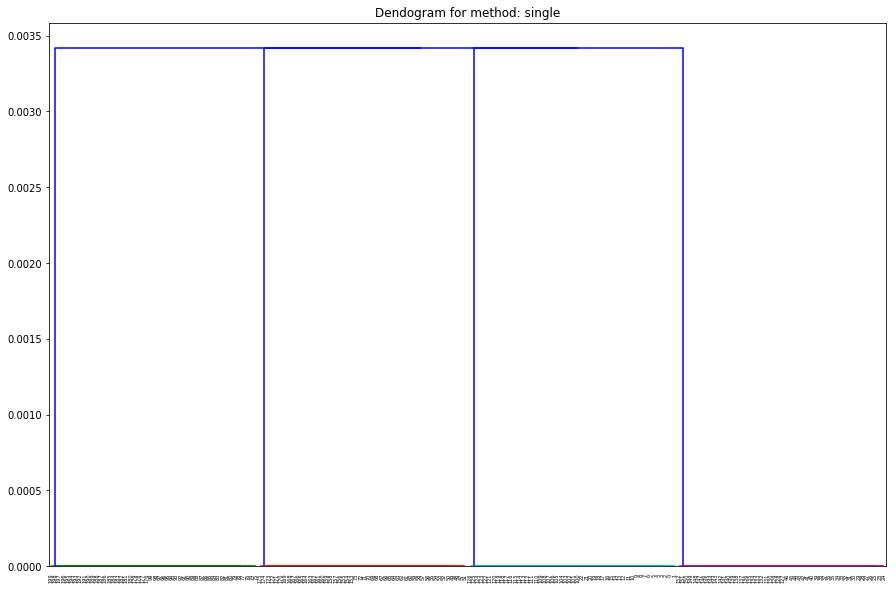

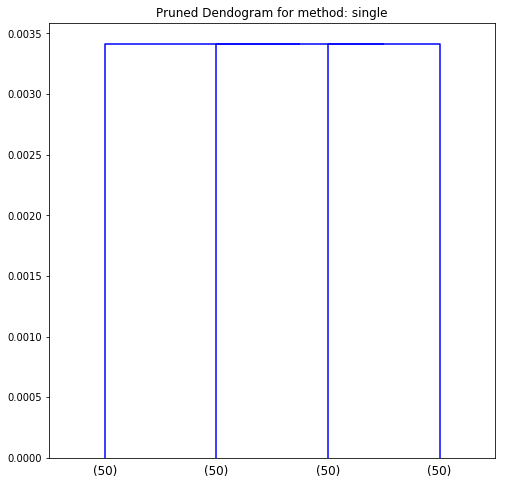

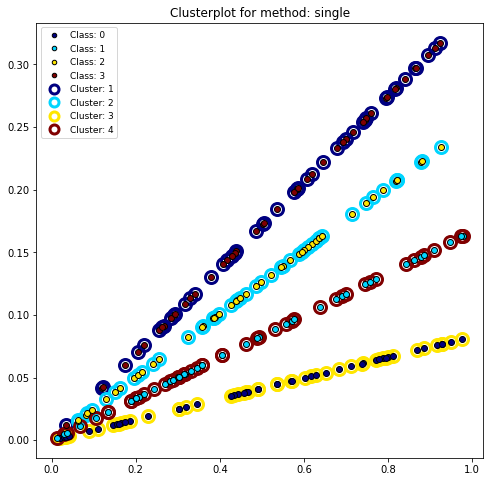

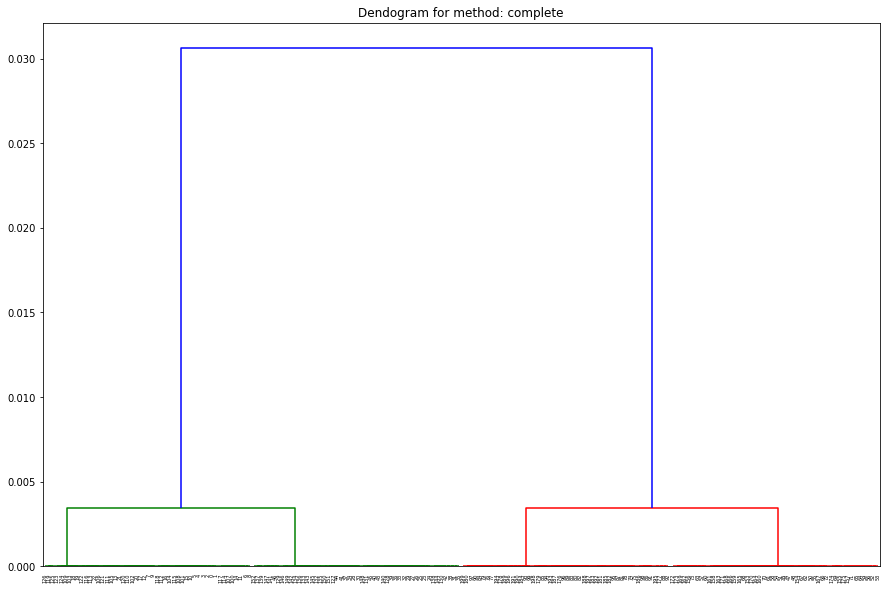

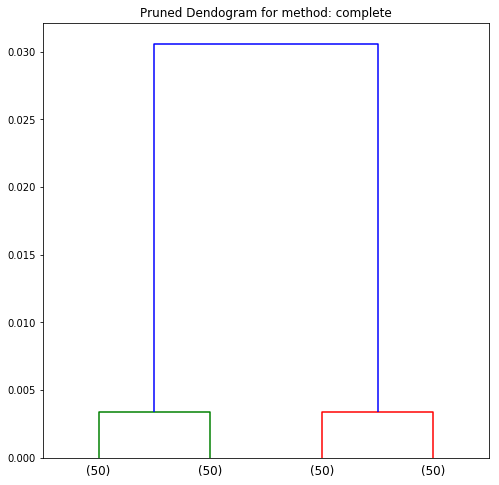

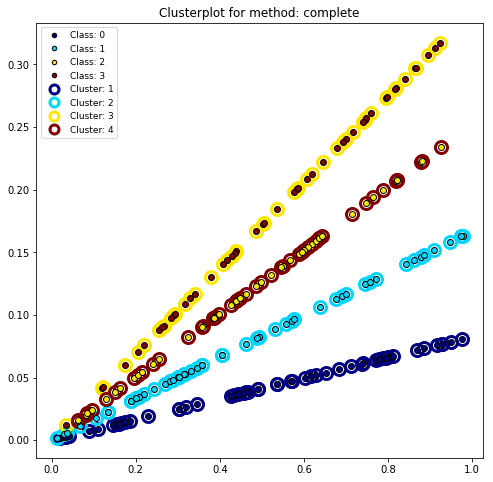

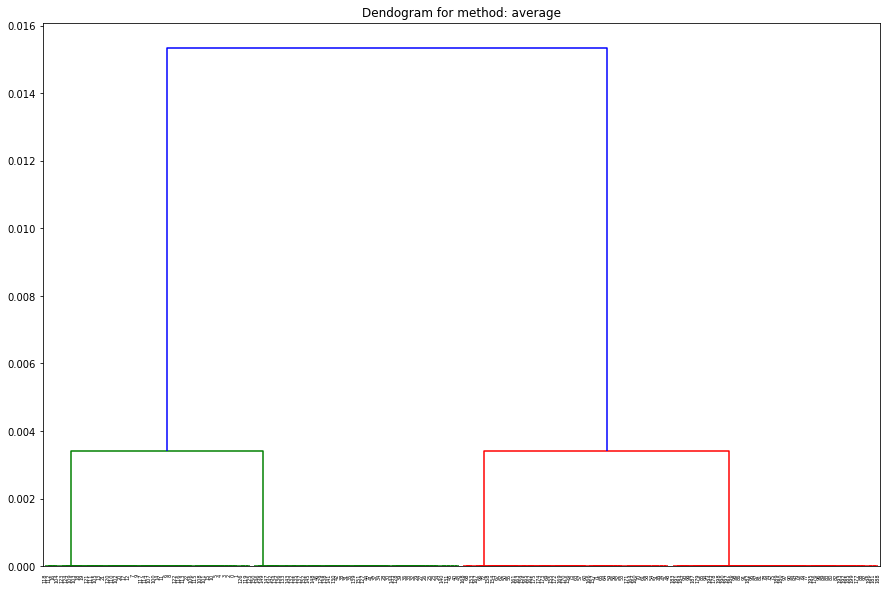

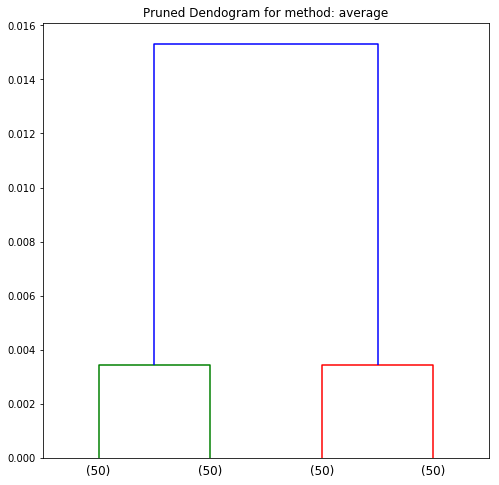

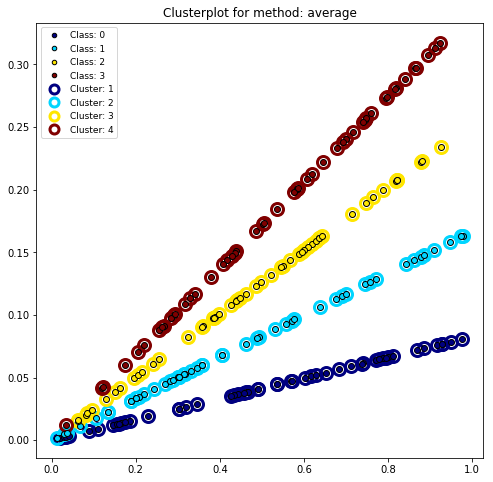

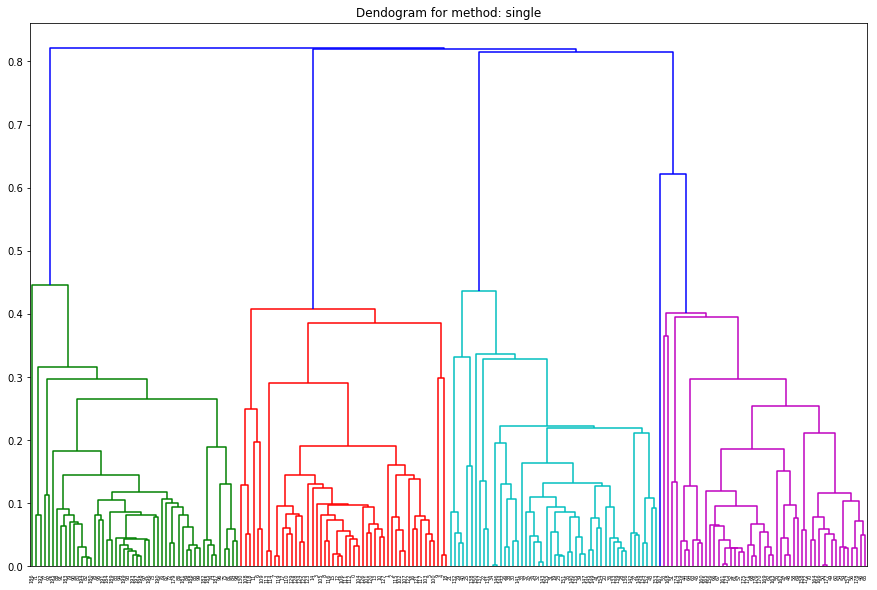

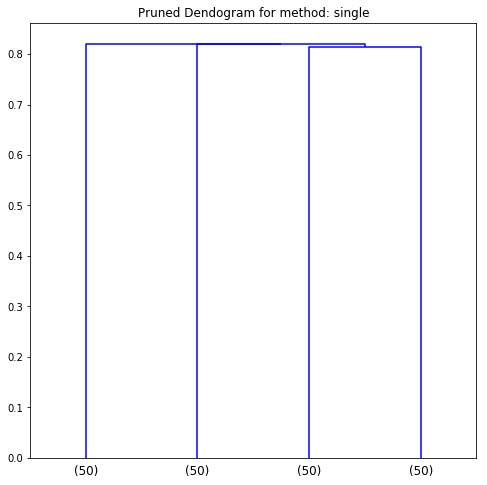

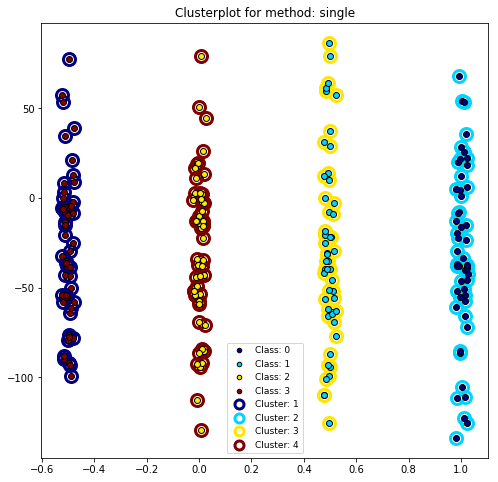

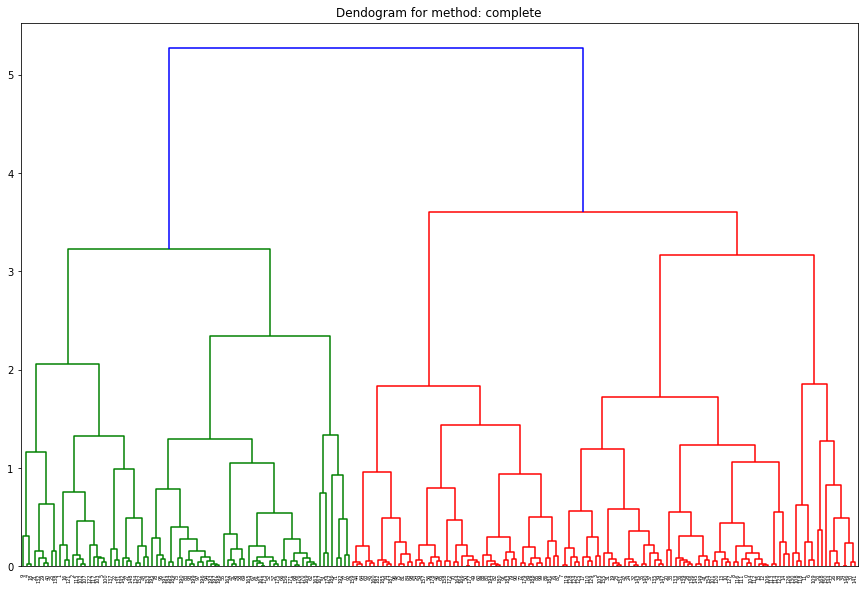

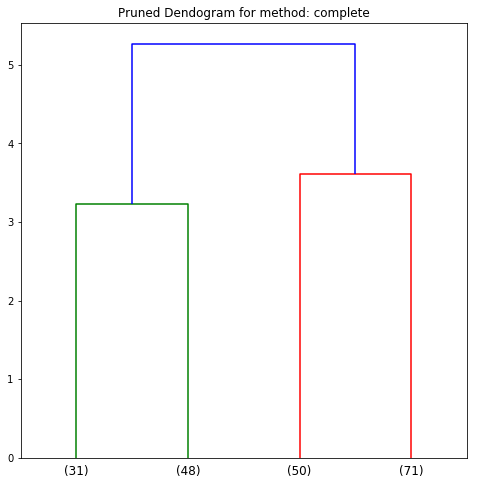

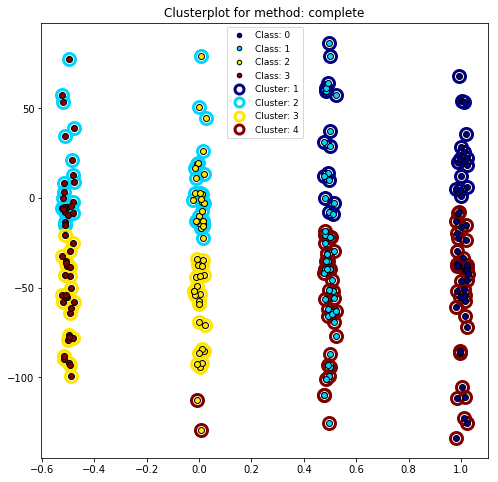

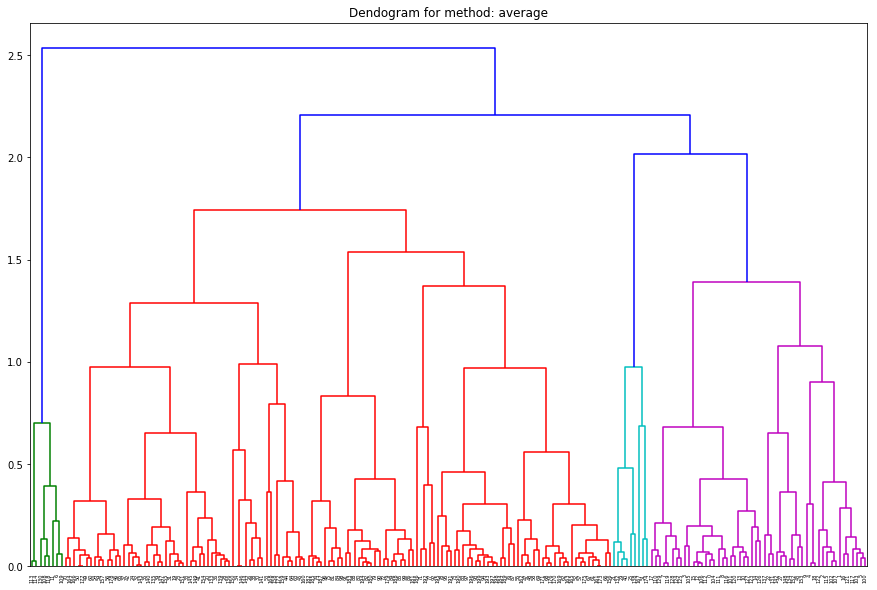

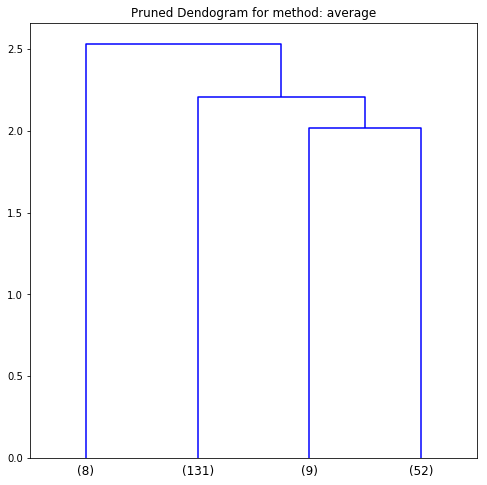

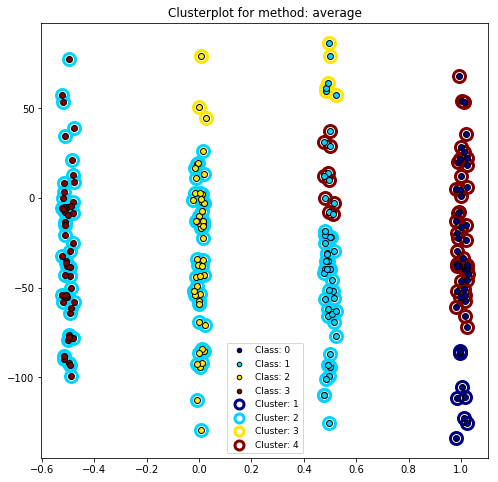

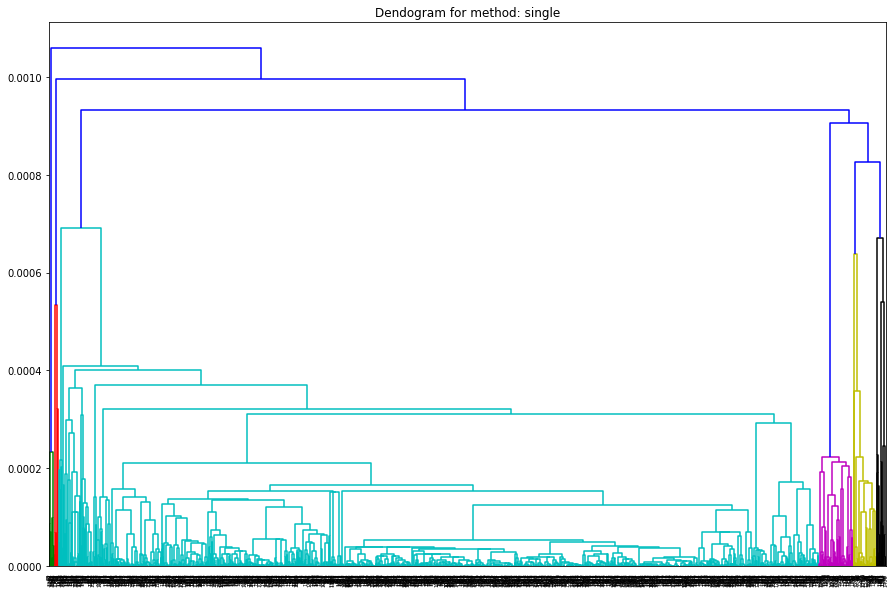

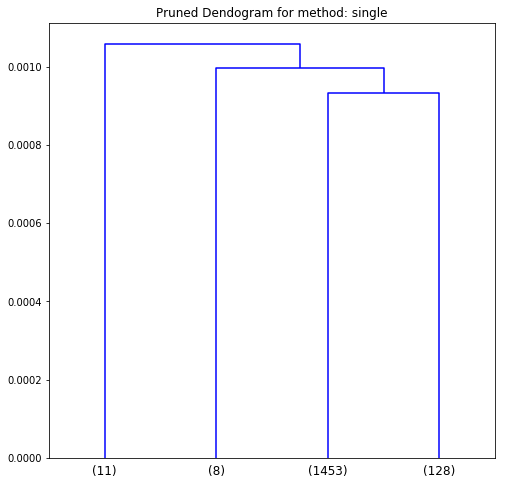

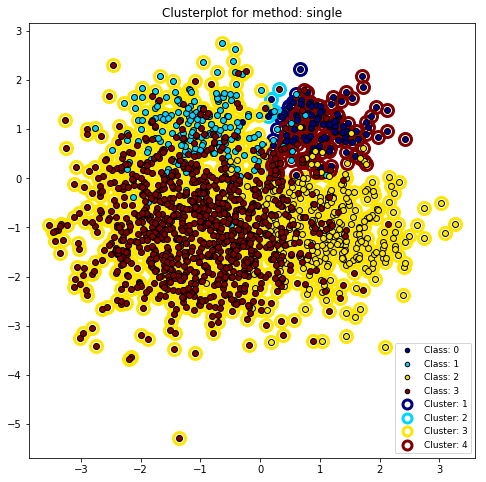

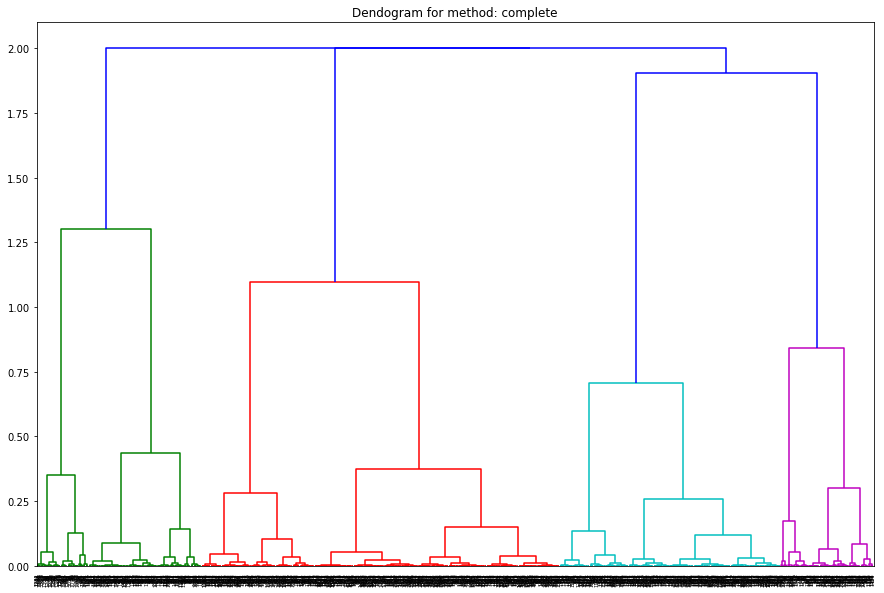

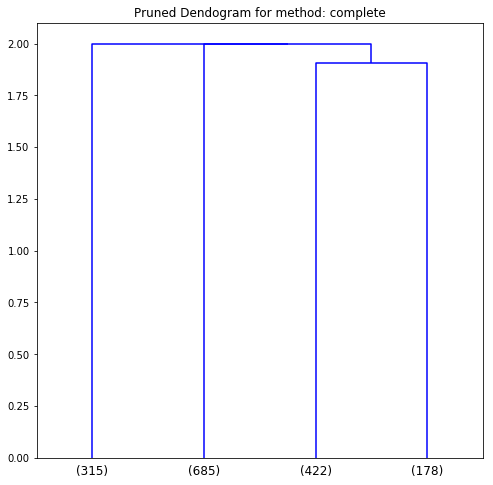

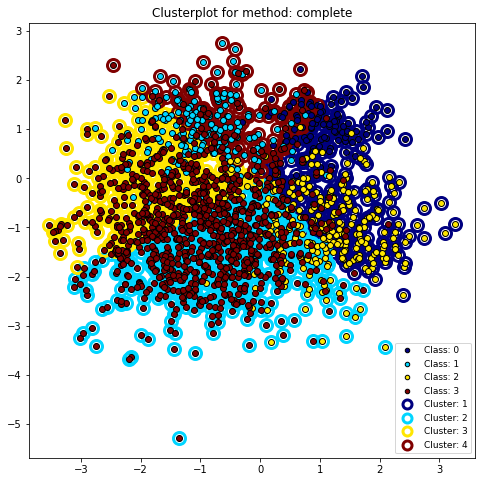

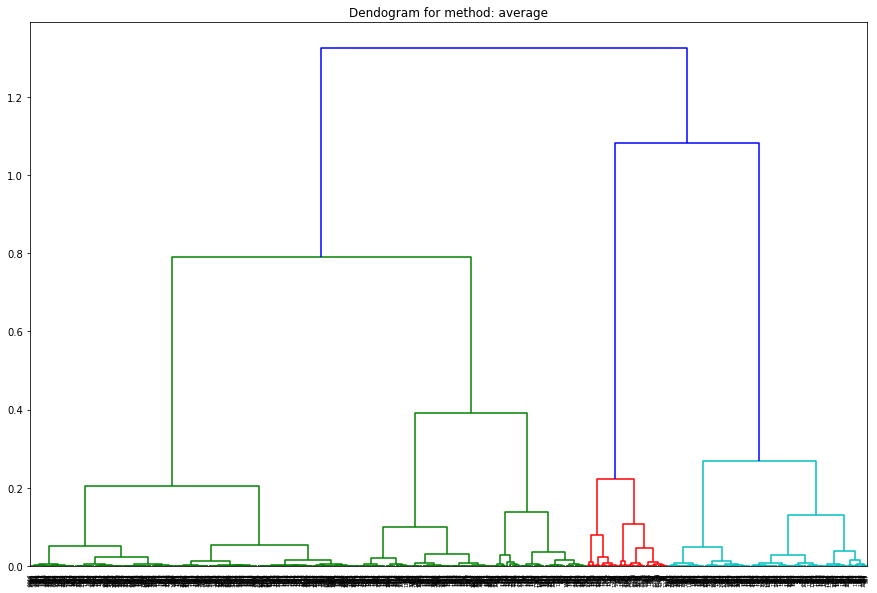

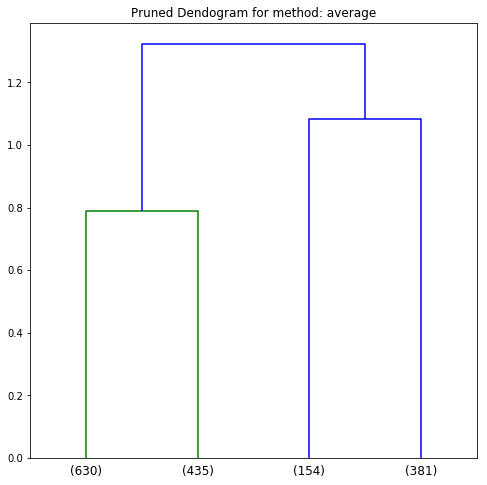

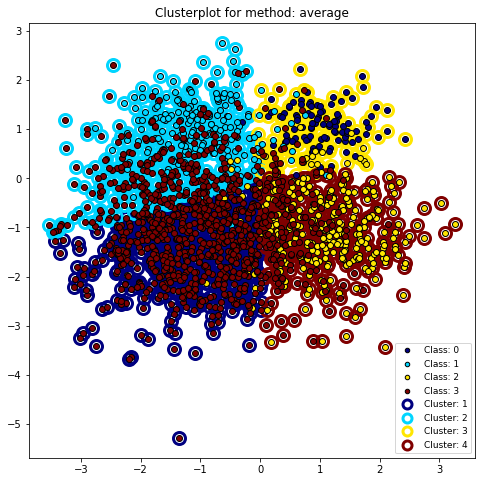

In [10]:
##Answer to question 4.2.1b

synth2 = loadmat('Data/synth2.mat')
synth3 = loadmat('Data/synth3.mat')
synth4 = loadmat('Data/synth4.mat')    

X2 = synth2['X']
y2 = synth2['y']
X3 = synth3['X']
y3 = synth3['y']
X4 = synth4['X']
y4 = synth4['y']
    

hclust(X2,y2,'cosine')
hclust(X3,y3,'seuclidean')
hclust(X4,y4,'cosine')

*Double click to type your answer for 4.1.3b here:*

Different method parameters represent different similarity measures for evaluating which clusters to merge in a bottom up process. 'single' uses the nearest datapoints in two clusters, 'complete' the furthest distance between 2 datapoints of the clusters and 'average' computes the average distance between all datapoints in the clusters. This results in different types of data structures to be clustered differently. All of the similarity measures work well for Synth1, favoring seperate clouds of data. However none of the algorithms capture the remaining datasets' essences. For example, because of Synth2's beam like structure, with a common origin and even fairly low angles between to beams, the nearest datapoint algorithm makes one cluster dominate, whereas the cosine similarity, which measures the angle between to vectors (datapoints) is much more suited. For Synth3, combined with the standardized euclidian distance, the nearest point measure works very well. The largest point distance scrambles the clusters too far apart. The last one is very difficult to cluster, because there is no obviously detectable cluster to see in my opinion. Synth4 could very well be consisting of 1 cluster, because there is high overlap between the four clusters. The average cluster distance coupled with a cosine similarity seems to produce moderate results.

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.